# Case study on Pre-processing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
#Importing relevant libraries

In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset

In [95]:
data= pd.read_csv(r'G:\my trials\Casestudy\titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
# Performing general analysis

In [97]:
data.shape

(891, 12)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Make ‘PassengerId’ as the index column

In [99]:
data= pd.read_csv(r'G:\my trials\Casestudy\titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Fill in all the missing values present in all the columns in the dataset

In [101]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [102]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [103]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
for i in ['Cabin','Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [105]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [106]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Survived')

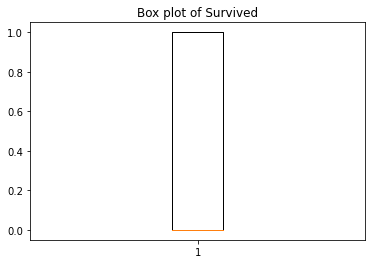

In [107]:
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

Text(0.5, 1.0, 'Box plot of Fare')

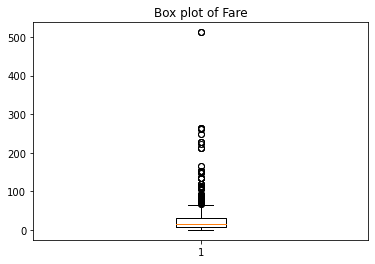

In [108]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [109]:
# outlier detection using IQR method 
Q1=np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2=np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3=np.percentile(data['Fare'], 75, interpolation='midpoint')

In [110]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [111]:
outlier=[]
for x in data['Fare']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [115]:
ind1=data['Fare']>up_lim
index_remove=data.loc[ind1].index
index_remove

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

Text(0.5, 1.0, 'Box plot of Age')

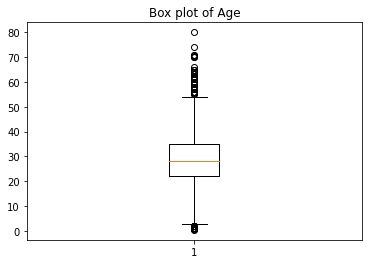

In [116]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [117]:
# outlier detection using IQR method 
Q1=np.percentile(data['Age'], 25, interpolation='midpoint')
Q2=np.percentile(data['Age'], 50, interpolation='midpoint')
Q3=np.percentile(data['Age'], 75, interpolation='midpoint')

In [118]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [119]:
outlier=[]
for x in data['Age']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [120]:
# to drop outliers
ind11=data['Age']>up_lim
index_remove=data.loc[ind1].index
index_remove

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

Text(0.5, 1.0, 'Box plot of SibSp')

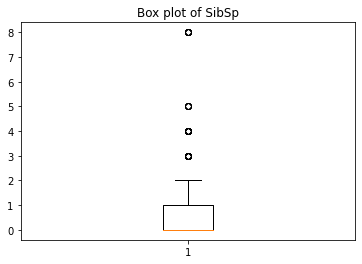

In [121]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [ ]:
**Insights:**<br>
--There are Outliers in the column 'SibSp'.<br>

In [122]:
# outlier detection using IQR method 
Q1=np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2=np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3=np.percentile(data['SibSp'], 75, interpolation='midpoint')

In [123]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [124]:
outlier=[]
for x in data['SibSp']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [125]:
ind11=data['SibSp']>up_lim
index_remove=data.loc[ind1].index
index_remove

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [126]:
data.drop(index=index_remove, inplace=True)

In [127]:
data.shape

(775, 11)

# Do min max scaling on the feature set (Take ‘Survived’ as target)

In [73]:
# creating feature set for modelling('survived' as target)
y=data['Survived']
X=data.drop(['Survived','Name','Sex','Cabin','Ticket','Embarked'], axis=1)


In [75]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
# creating a linear regression model
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:', mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))

MSE is: 0.1869580296088411
Rsquared value is: 0.2290447584688703


In [77]:
from sklearn import preprocessing

In [78]:
# Min max scaling
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)

In [82]:
# creating a linear regression model after min max scaling
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:'mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))

MSE is: 0.18695802960884117
Rsquared value is: 0.22904475846886996
